In [ ]:
using Plots
using DifferentialEquations

# Mechanics Approaches

## Lagrangian Mechanics

Lagrangian mechanics provides an elegant framework for analyzing classical systems. The key object is the Lagrangian, defined as

$$L = L(q,\dot{q},t)$$

where $q = (q_1,\dots,q_N)$ are the generalized coordinates and $\dot{q} = (\dot{q}_1,\dots,\dot{q}_N)$ are their time derivatives. The Lagrangian is typically the difference between kinetic and potential energy:

$$L = T - V$$

Dynamics are governed by the Euler-Lagrange equations:

$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}_i}\right) - \frac{\partial L}{\partial q_i} = 0$$

These second-order differential equations reproduce Newton's equations $F=ma$. But Lagrangian mechanics has several advantages such as:

- Scalar quantities $T$ and $V$ are easier to work with than vector forces
- Equations have the same form regardless of coordinate choices
- Constraints are easily incorporated
- To see the last point, consider a particle constrained to a surface $f(q_1,\dots,q_N,t) = 0$. We can choose independent generalized coordinates $q_j, j=1,\dots,N-k$ that satisfy the $k$ constraints. The Euler-Lagrange equations then provide the dynamics. Constraint forces never enter explicitly.

┌ Info: Saved animation to /home/jose/Documents/STUDY/PhD/ClassicalMech/notes/01_analytical_mechanics/pendulum.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/PhD/ClassicalMech/notes/01_analytical_mechanics/pendulum.gif")
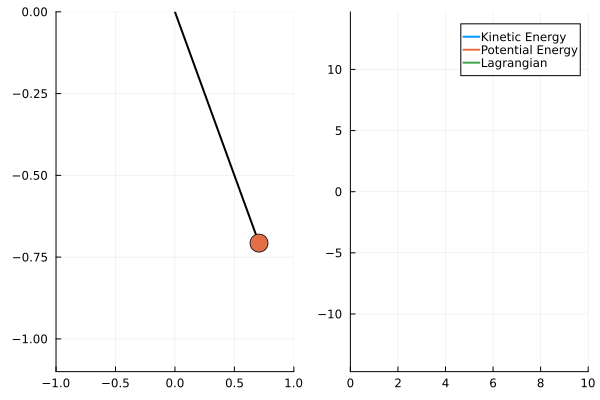

In [19]:
function pendulum!(du, u, p, t)
    g, L = p
    du[1] = u[2]
    du[2] = -g/L*sin(u[1])
end
g = 9.81 # acceleration due to gravity
L = 1.0 # length of pendulum
u0 = [π/4, 0] # initial angle and angular velocity
tspan = (0.0, 10.0) # time span for the solution
p = [g, L]
prob = ODEProblem(pendulum!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
kinetic(u) = 0.5*L^2*u[2]^2
potential(u) = -g*L*cos(u[1])
Lagrangian(u) = kinetic(u) - potential(u)
anim = @animate for i in 1:length(sol.t)
    p1 = plot(legend=false, size=(600, 400), xlims=(-L, L), ylims=(-L - 0.1*L, 0))
    x = L*sin(sol.u[i][1])
    y = -L*cos(sol.u[i][1])
    plot!([0, x], [0, y], linewidth=2, color=:black)
    scatter!(p1, [x], [y], markersize=10)
    p2 = plot(sol.t[1:i], kinetic.(sol.u[1:i]), label="Kinetic Energy", linewidth=2)
    plot!(sol.t[1:i], potential.(sol.u[1:i]), label="Potential Energy", linewidth=2)
    plot!(sol.t[1:i], Lagrangian.(sol.u[1:i]), label="Lagrangian", linewidth=2, linestyle=:dash, xlims=tspan, ylims=(-1.5*g*L, 1.5*g*L))
    plot(p1, p2, layout=(1, 2))
end
gif(anim, "pendulum.gif", fps=30)


### The principle of least action

The principle of least action states that the path a physical system takes between two points in its configuration space is the one that minimizes the action $S$, where the action is defined as the integral of the Lagrangian $L$ over time $t$.


The action $S$ is then defined as:

$$
S = \int L(q, \dot{q}, t) dt
$$

We want to find the path $q(t)$ that minimizes $S$. This is a problem of calculus of variations. The solution can be found by requiring that the first variation of $S$ vanishes:

$$
\delta S = 0
$$

This leads to the Euler-Lagrange equations. If we take the variation of $S$ we get:

$$
\delta S = \int \left( \frac{\partial L}{\partial q} \delta q + \frac{\partial L}{\partial \dot{q}} \delta \dot{q} \right) dt
$$

By integrating the second term by parts, we get:

$$
\delta S = \int \left( \frac{\partial L}{\partial q} - \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) \right) \delta q , dt + \left[ \delta q \frac{\partial L}{\partial \dot{q}} \right]_{t_1}^{t_2}
$$

The second term vanishes if we assume that $\delta q$ vanishes at the endpoints of the path (which is the usual assumption), so we get:

$$
\delta S = \int \left( \frac{\partial L}{\partial q} - \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) \right) \delta q , dt = 0
$$

Since this must hold for all variations $\delta q$, we are led to the Euler-Lagrange equations:

$$
\frac{\partial L}{\partial q} - \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) = 0
$$

┌ Info: Saved animation to /home/jose/Documents/STUDY/PhD/ClassicalMech/notes/01_analytical_mechanics/anim2.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/PhD/ClassicalMech/notes/01_analytical_mechanics/anim2.gif")
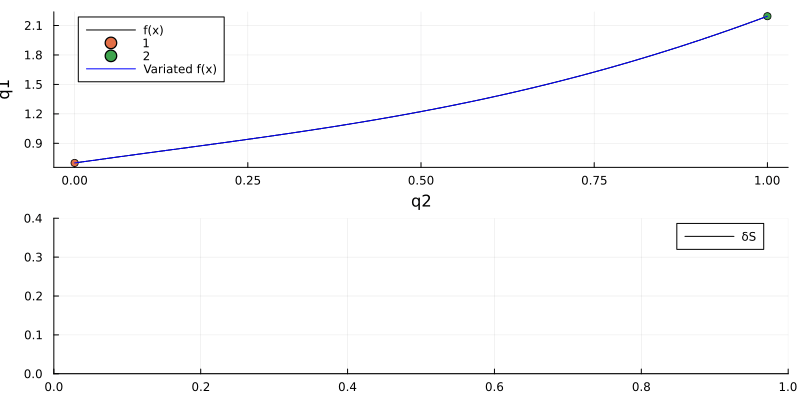

In [83]:
# Some strange parametric function that goes from point_1 to point_2
f(x) = 0.5*(cos(x)) + 0.1*(1+cos(x))*cos(x) + x^2 * sin(x) + x 
point_1 = [0, 0]
point_2 = [1, f(1)]
anim2 = @animate for d in range(0, 2*π, length=100)
    p1 = plot(f, 0, 1, color=:black, label="f(x)", xlabel="q2", ylabel="q1")
    scatter!([0], [f(0)], label="1")
    scatter!([1], [f(1)], label="2")
    eps(x, d) = (x) * (1-x) * sin(d)
    # The boundaries are the same as the function
    variated_f(x) = f(x) + eps(x, d)
    plot!(variated_f, 0, 1, color=:blue, label="Variated f(x)")
    #Plot the RMS difference between the two functions
    p2 = plot(x -> sqrt((f(x) - variated_f(x))^2), 0, 1, color=:black, label="δS", xlims=(0,1), ylims=(0,0.4))
    plot(p1, p2, layout=(2,1), size=(800, 400))

end
gif(anim2, "anim2.gif", fps = 15)

## Hamiltonian Mechanics
In Hamiltonian mechanics, the canonical momenta

$$p_i = \frac{\partial L}{\partial \dot{q}_i}$$

are put on equal footing with the generalized coordinates $q_i$. Together $(q,p)$ form the phase space description.

The Hamiltonian is defined by the Legendre transform

$$H(q,p,t) = \dot{q}_i p_i - L(q,\dot{q},t)$$

Dynamics are governed by Hamilton's equations:

$$\dot{q}_i = \frac{\partial H}{\partial p_i}, \quad \dot{p}_i = -\frac{\partial H}{\partial q_i}$$

Hamiltonian and Lagrangian approaches are equivalent, but each has advantages:

Hamiltonians have beautiful phase space structure and Poisson bracket formalism
Powerful transformation theory via generating functions
More direct connection to quantum mechanics
For simple cases where $T=\frac{1}{2}\dot{q}iT{ij}\dot{q}_j$ and $V=V(q)$, the Hamiltonian equals the total energy $H=E=T+V$.

┌ Info: Saved animation to /home/jose/Documents/STUDY/PhD/ClassicalMech/notes/01_analytical_mechanics/pendulum.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/PhD/ClassicalMech/notes/01_analytical_mechanics/pendulum.gif")
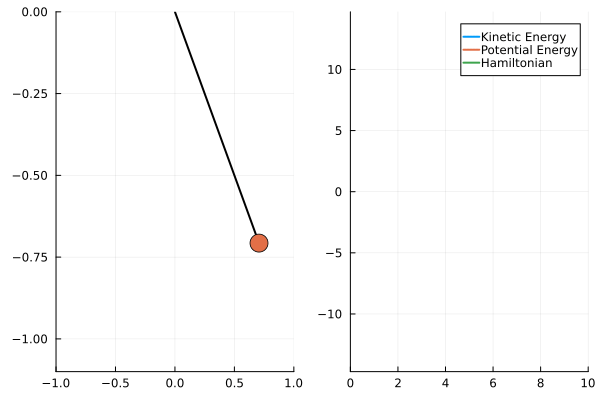

In [18]:
hamiltonian(u) = kinetic(u) + potential(u)
anim = @animate for i in 1:length(sol.t)
    p1 = plot(legend=false, size=(600, 400), xlims=(-L, L), ylims=(-L - 0.1*L, 0))
    x = L*sin(sol.u[i][1])
    y = -L*cos(sol.u[i][1])
    plot!([0, x], [0, y], linewidth=2, color=:black)
    scatter!(p1, [x], [y], markersize=10)
    p2 = plot(sol.t[1:i], kinetic.(sol.u[1:i]), label="Kinetic Energy", linewidth=2)
    plot!(sol.t[1:i], potential.(sol.u[1:i]), label="Potential Energy", linewidth=2)
    plot!(sol.t[1:i], hamiltonian.(sol.u[1:i]), label="Hamiltonian", linewidth=2, linestyle=:dash, xlims=tspan, ylims=(-1.5*g*L, 1.5*g*L))
    plot(p1, p2, layout=(1, 2))
end
gif(anim, "pendulum.gif", fps=30)